In [1]:
# Import library/modul yg dibutuhkan
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Koneksikan dgn Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Muat datasets
url = "/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv"
pima = pd.read_csv(url)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


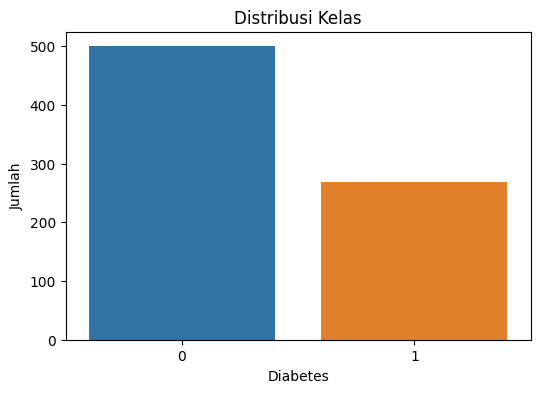

In [4]:
# Tampilkan distribusi kelas
df = pd.DataFrame(pima)
class_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribusi Kelas')
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.show()

In [5]:
# Memecah fitur dan variabel target pada dataset
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fitur
X = pima[feature_cols]

# Variabel target
y = pima.Outcome

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [8]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [9]:
# Memisahkan X dan y menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=0)

In [10]:
X_test

array([[0.05882353, 1.        , 0.62295082, ..., 0.63934426, 0.56191289,
        0.01666667],
       [0.11764706, 0.53768844, 0.60655738, ..., 0.50074516, 0.13919727,
        0.03333333],
       [0.23529412, 0.38190955, 0.50819672, ..., 0.50670641, 0.13364646,
        0.06666667],
       ...,
       [0.23529412, 0.71356784, 0.70491803, ..., 0.6557377 , 0.24210077,
        0.01666667],
       [0.17647059, 0.58291457, 0.60655738, ..., 0.39195231, 0.01238258,
        0.05      ],
       [0.05882353, 0.53768844, 0.59016393, ..., 0.45901639, 0.31725021,
        0.05      ]])

In [11]:
# Membuat dan melatih klasifikasi Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Akurasi: 0.79
              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



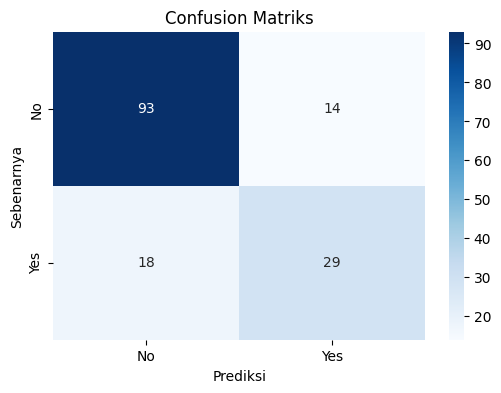

In [12]:
from sklearn.metrics import classification_report

# Buat prediksi
y_pred = gnb.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Visualisasikan Confusion Matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matriks')
plt.show()